In [1]:
# Data Distribution

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
from pymongo import MongoClient
import csv
from geopy.geocoders import Bing
from config import BING_API_KEY

In [4]:
# Check the dataset
df = pd.read_csv ("Heart_36_Col.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302498 entries, 0 to 302497
Data columns (total 36 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      302498 non-null  object 
 1   Sex                        302498 non-null  object 
 2   GeneralHealth              302498 non-null  object 
 3   PhysicalHealthDays         302498 non-null  float64
 4   MentalHealthDays           302498 non-null  float64
 5   LastCheckupTime            302498 non-null  object 
 6   PhysicalActivities         302498 non-null  object 
 7   SleepHours                 302498 non-null  float64
 8   RemovedTeeth               302498 non-null  object 
 9   HadHeartAttack             302498 non-null  object 
 10  HadAngina                  302498 non-null  object 
 11  HadStroke                  302498 non-null  object 
 12  HadAsthma                  302498 non-null  object 
 13  HadSkinCancer              30

In [9]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Compute basic statistical measures
stats_summary = df[numeric_columns].describe().transpose()

# Display the statistical summary
print(stats_summary)

                       count       mean        std        min         25%  \
PhysicalHealthDays  302498.0   4.080397   8.350026    0.00000    0.000000   
MentalHealthDays    302498.0   4.275463   8.158945    0.00000    0.000000   
SleepHours          302498.0   7.029815   1.428272    1.00000    6.000000   
HeightInMeters      302498.0   1.706930   0.106579    0.91000    1.630000   
WeightInKilograms   302498.0  83.565928  21.353982   22.68000   68.040000   
BMI                 302498.0  28.590248   6.507779   12.02000   24.210000   
Latitude            302498.0  39.924353   6.299034   19.61087   37.254669   
Longitude           302498.0 -93.737697  19.112193 -155.52742 -105.547836   

                          50%        75%         max  
PhysicalHealthDays   0.000000   3.000000   30.000000  
MentalHealthDays     0.000000   5.000000   30.000000  
SleepHours           7.000000   8.000000   24.000000  
HeightInMeters       1.700000   1.780000    2.410000  
WeightInKilograms   81.650000  

In [11]:
# Identify binary columns
binary_columns_1 = [col for col in df.columns if df[col].nunique() == 2]

In [12]:
# Convert binary columns to 0 and 1
for col in binary_columns_1:
    unique_values = df[col].unique()
    if set(unique_values) != {0, 1}:
        df[col] = df[col].map({unique_values[0]: 0, unique_values[1]: 1})
# Verify conversion
all_binary = True
for col in binary_columns_1:
    unique_values = set(df[col].unique())
    if unique_values != {0, 1}:
        all_binary = False
        print(f"Column {col} has non-binary values: {unique_values}")

if all_binary:
    print("All binary columns have been successfully converted to 0 and 1.")
else:
    print("Some columns still have non-binary values.")


All binary columns have been successfully converted to 0 and 1.


In [13]:
 def convert_to_int(df, binary_columns):
    for col in binary_columns_1:
        # Use .loc to ensure we are modifying the DataFrame in place
        df.loc[:, col] = df[col].astype('int8')
    return df
    
df = convert_to_int(df, binary_columns_1)
# Verify conversion (no warning should be issued)
print(df.dtypes)

State                         object
Sex                            int64
GeneralHealth                 object
PhysicalHealthDays           float64
MentalHealthDays             float64
LastCheckupTime               object
PhysicalActivities             int64
SleepHours                   float64
RemovedTeeth                  object
HadHeartAttack                 int64
HadAngina                      int64
HadStroke                      int64
HadAsthma                      int64
HadSkinCancer                  int64
HadCOPD                        int64
HadDepressiveDisorder          int64
HadKidneyDisease               int64
HadArthritis                   int64
HadDiabetes                   object
DeafOrHardOfHearing            int64
BlindOrVisionDifficulty        int64
DifficultyConcentrating        int64
DifficultyWalking              int64
DifficultyDressingBathing      int64
DifficultyErrands              int64
SmokerStatus                  object
ECigaretteUsage               object
R

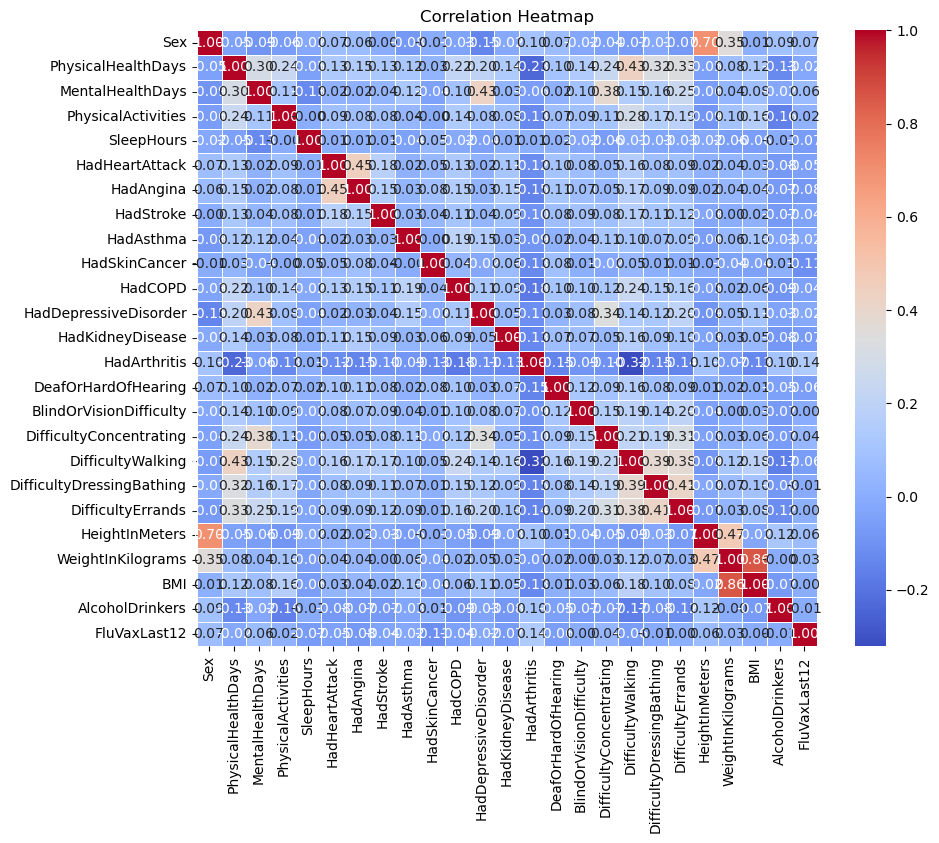

In [16]:
# Columns to exclude
excluded_columns = ['State','GeneralHealth', 'LastCheckupTime', 'RemovedTeeth', 'HadDiabetes', 
                    'SmokerStatus', 'ECigaretteUsage', 'RaceEthnicityCategory', 'AgeCategory', 'Latitude','Longitude']

# Exclude specified columns from the DataFrame
df_subset = df.drop(columns=excluded_columns)

# Calculate the correlation matrix
correlation_matrix = df_subset.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


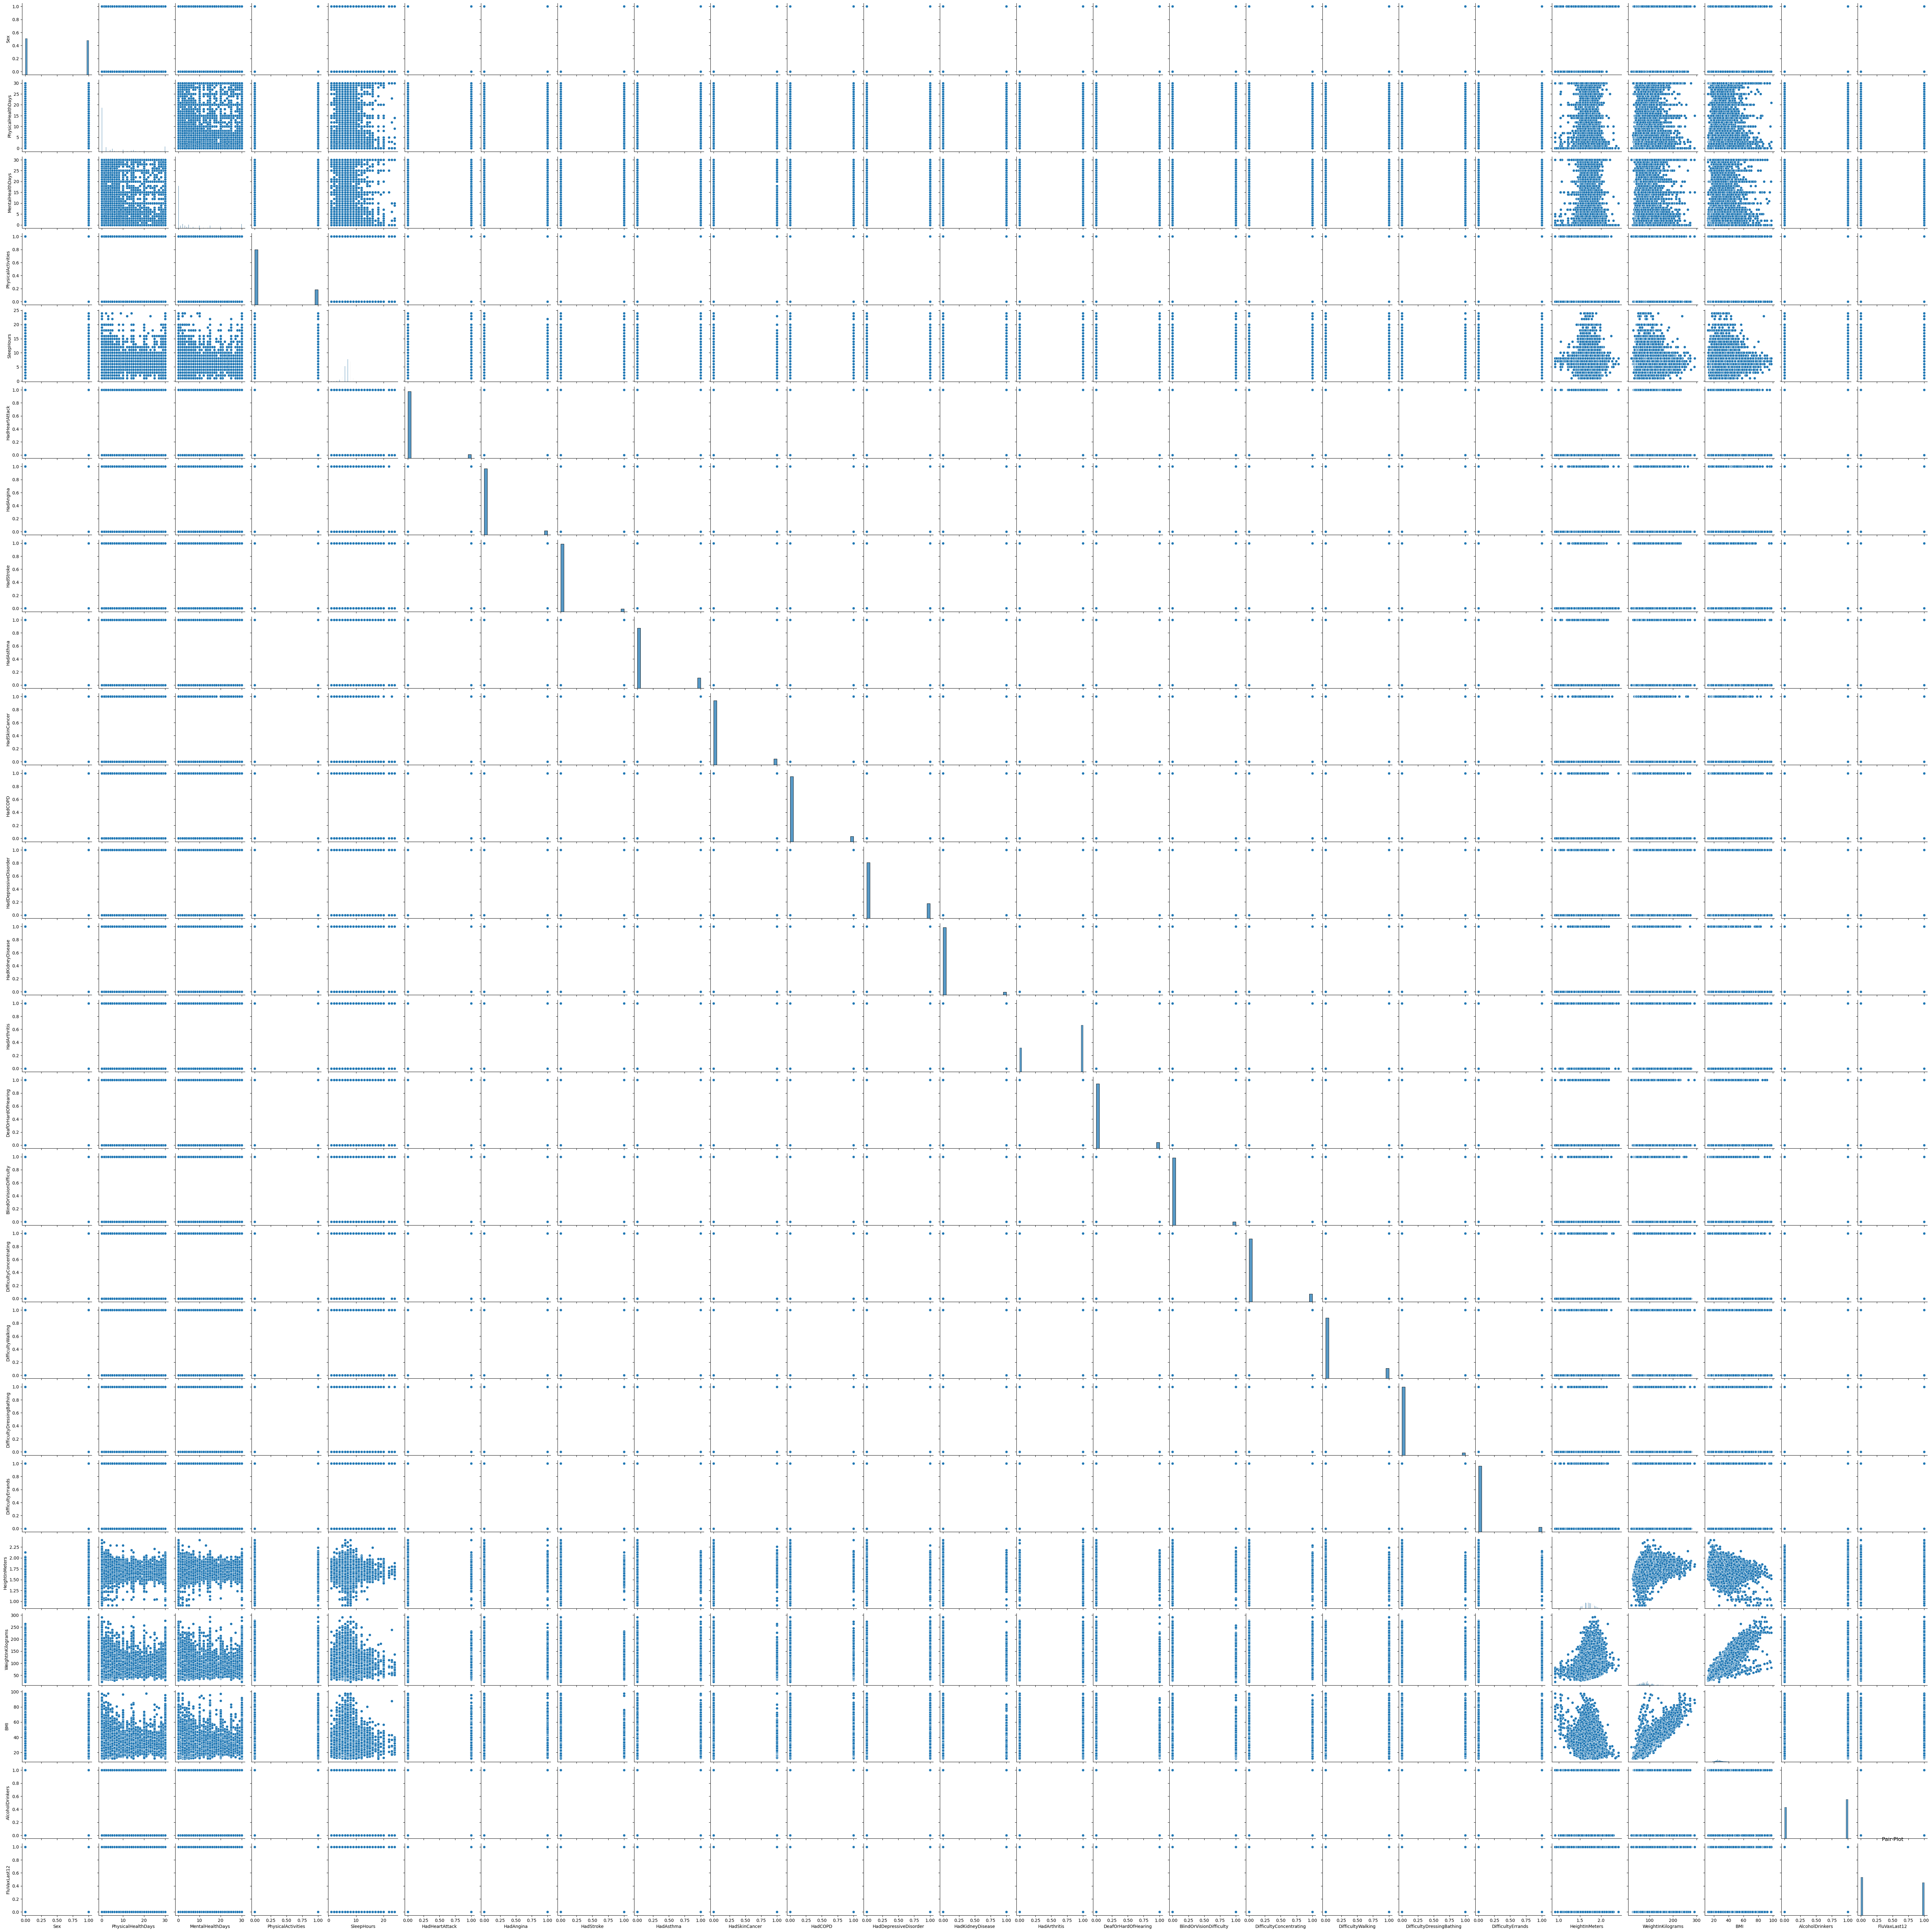

In [18]:
# Pair Plot
sns.pairplot(df_subset)
plt.title('Pair Plot')
plt.show()

In [ ]:
#1. Predicting the Likelihood of a HeartAttack
# 2. Identifying the Most Important Predictors of Developing HeartAttack
# 3. Exploring the Correlation Between Physical Activity and the Incidence of Heart Attacks